# Fast SLAM

## 8.3 implement paricle filter

In [2]:
import sys
sys.path.append('../scripts/')
from kf import * # this also import Mcl class

In [3]:
class FastSlam(Mcl):
    def __init__(self, envmap, init_pose, num_particle, num_landmark, motion_noise_stds={"nn":0.19, "no":0.001, "on":0.13, "oo":0.2},                  
                 distance_dev_rate=0.14, direction_dev=0.05):
        super().__init__(envmap, init_pose, num_particle, motion_noise_stds, distance_dev_rate, direction_dev)

In [6]:
def trial():
    time_interval = 0.1
    world = World(30, time_interval, debug = False)
    
    m = Map()
    for landmark in [(-4,2),(2,-3),(3,3)]: 
        m.append_landmark((Landmark(*landmark)))
    world.append(m)
    
    init_pose = np.array([0,0,0]).T
    num_particle = 100
    fastslam = FastSlam(m, init_pose, num_particle, len(m.landmarks))
    nu = 0.2
    omega = 10.0/180*math.pi
    agent = EstimationAgent(time_interval, nu, omega, fastslam) # in Mcl class
    robot = Robot(init_pose, sensor=Camera(m), agent=agent, color='red')
    world.append(robot)
    
    world.draw()

<IPython.core.display.Javascript object>


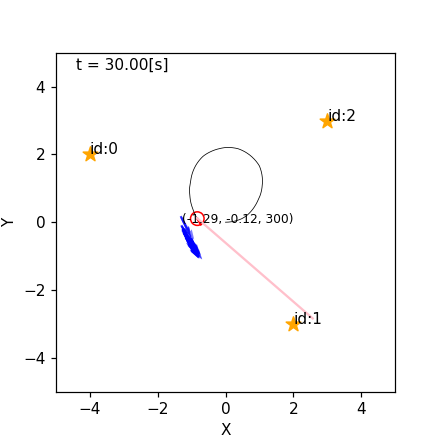

In [7]:
trial()